## a)

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as ss

In [33]:
B,n=10000,30
mu=100
sigma=10
xbar=[]
sig2=[]
LCL=[]
UCL=[]
alpha=0.05


In [34]:
 for _ in range(B):
    s0=np.random.normal(mu,sigma,n)
    xbar.append(np.mean(s0))
    sig2.append(np.var(s0,ddof=1))

In [35]:
z_alpha2=ss.norm.ppf(1-alpha/2)

<Axes: ylabel='Density'>

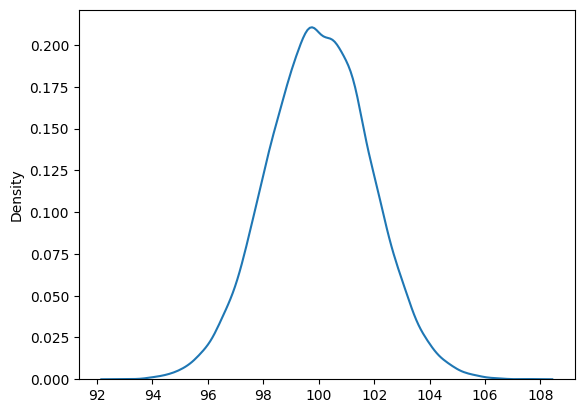

In [36]:
sns.kdeplot(xbar)

In [41]:
LCL=xbar-z_alpha2*np.sqrt(sig2)/np.sqrt(n)
UCL=xbar+z_alpha2*np.sqrt(sig2)/np.sqrt(n)

In [42]:
df=pd.DataFrame({"xbar":xbar,"Sig2":sig2,"lower":LCL,"upper":UCL,"MeanInCI":(LCL<mu)&(mu<df.upper)})
np.mean(df.MeanInCI)

np.float64(0.9364)

In [43]:
(df.lower<mu)&(mu<df.upper)

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

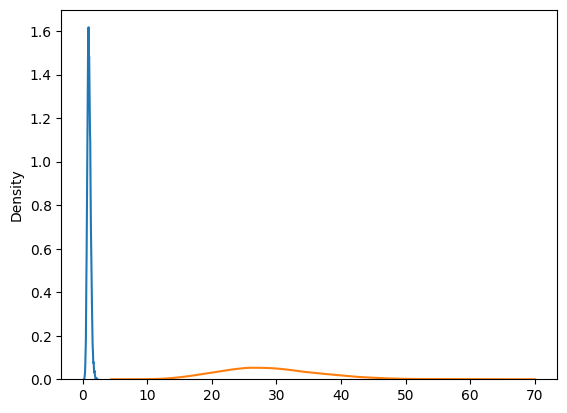

In [44]:
sns.kdeplot((n-1)*sig2/np.float64(sigma**2))
sns.kdeplot(np.random.chisquare(n-1,10000))
plt.show()

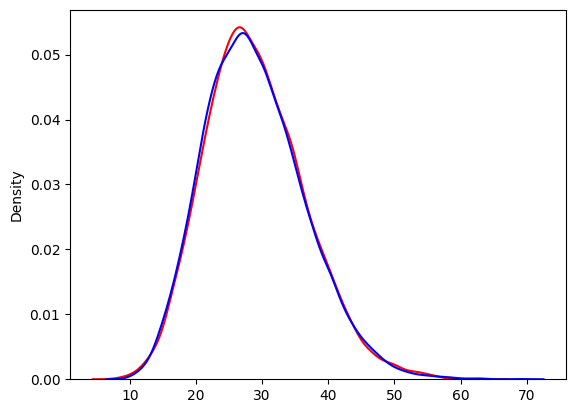

In [45]:
sns.kdeplot((n-1)*np.array(sig2)/(sigma**2),color="Red")
sns.kdeplot(np.random.chisquare(n-1,10000),color="Blue")
plt.show()

## Extra Question

In [60]:
## Same as above Distribution is Change

In [46]:
##2) [According to Chatgpt]

In [51]:
import numpy as np


In [52]:
p = 0.4
n0 = 10          # Binomial trials
B = 10000        # Monte Carlo replications
n1, n2 = 10, 50  # sample sizes

def monte_carlo_binomial(n):
    estimates = []

    for _ in range(B):
        sample = np.random.binomial(n0, p, n)
        p_hat = np.mean(sample) / n0
        estimates.append(p_hat)

    estimates = np.array(estimates)

    bias = np.mean(estimates) - p
    variance = np.var(estimates)
    mse = bias**2 + variance

    return bias, variance, mse

b1, v1, m1 = monte_carlo_binomial(n1)
b2, v2, m2 = monte_carlo_binomial(n2)

print("Sample size =", n1)
print("Bias =", b1)
print("Variance =", v1)
print("MSE =", m1)

print("\nSample size =", n2)
print("Bias =", b2)
print("Variance =", v2)
print("MSE =", m2)

Sample size = 10
Bias = 0.00017099999999997673
Variance = 0.002354000759000001
MSE = 0.002354030000000001

Sample size = 50
Bias = 0.00021939999999998072
Variance = 0.0004682602636400003
MSE = 0.0004683084000000003


## OR

In [ ]:
[According to Practical Code]

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as ss

In [65]:
p=0.5
B=10000
p_hat=[]
xbar=[]
UCL=[]
LCL=[]
n=30
alpha=0.05

In [69]:
for _ in range(B):
    sample=np.random.binomial(1,p,n)
    ph=np.mean(sample)
    p_hat.append(ph)
z_alpha2=ss.norm.ppf(1-alpha/2)
LCL=ph-z_alpha2*np.sqrt((ph*(1-ph))/n)
UCL=ph+z_alpha2*np.sqrt((ph*(1-ph))/n)
df=pd.DataFrame({"p_hat":p_hat,"Lower":LCL,"Upper":UCL,"MeanInCI":(LCL<ph)&(ph<UCL)})
np.mean(df.MeanInCI)
print(df)

          p_hat     Lower     Upper  MeanInCI
0      0.333333  0.288145  0.645188      True
1      0.333333  0.288145  0.645188      True
2      0.466667  0.288145  0.645188      True
3      0.600000  0.288145  0.645188      True
4      0.466667  0.288145  0.645188      True
...         ...       ...       ...       ...
19995  0.433333  0.288145  0.645188      True
19996  0.333333  0.288145  0.645188      True
19997  0.600000  0.288145  0.645188      True
19998  0.533333  0.288145  0.645188      True
19999  0.466667  0.288145  0.645188      True

[20000 rows x 4 columns]


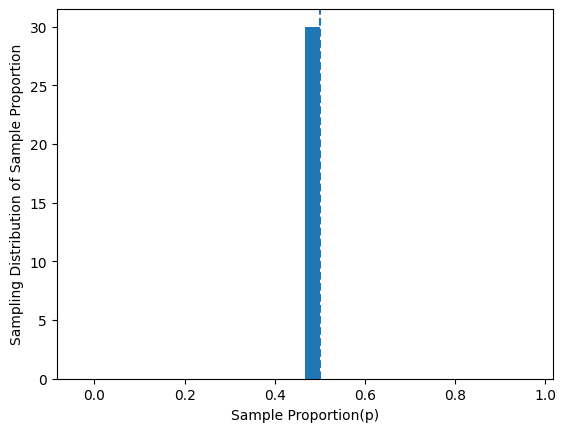

In [70]:
plt.hist(ph,bins=30,density=True)
plt.axvline(p,linestyle='--')
plt.xlabel("Sample Proportion(p)")
plt.ylabel("Sampling Distribution of Sample Proportion")
plt.show()

<Axes: ylabel='Density'>

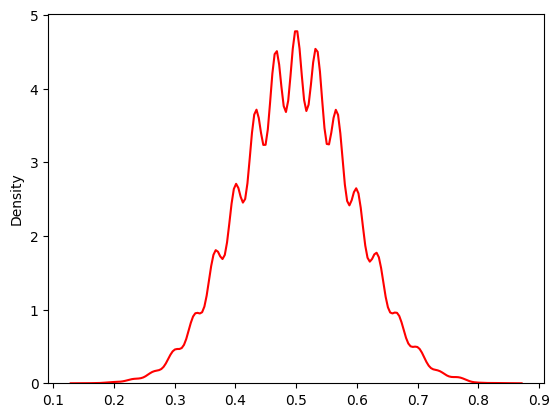

In [71]:
sns.kdeplot(p_hat,color="red")

## b)

In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
B,n=1000,30
mu,sig=100,10
Decision=[]
alpha=0.05
diff=np.linspace(-5,5,5)
power=[]
for j in diff:
    Decision=[]
    for _ in range(B):
        t_stat,pval=ss.ttest_1samp(np.random.normal(mu+j,sig,n),100)
        Decision.append(pval<alpha)
    power.append(np.mean(Decision))
power
 

[np.float64(0.754),
 np.float64(0.262),
 np.float64(0.043),
 np.float64(0.256),
 np.float64(0.747)]

In [43]:
pd.DataFrame({"Difference":diff,"Power":power})       

,Difference,Power
0,-5.0,0.754
1,-2.5,0.262
2,0.0,0.043
3,2.5,0.256
4,5.0,0.747


## c)

In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy import stats

In [60]:
B,n=1000,[5,10,50]
mu,sig=100,10
Decision=[]
alpha=0.05
Differences=[]
power=[]
Size=[]
for i in n:
    diff=np.linspace(-5,5,5)
    for j in diff:
         Decision=[]
         for _ in range(B):
             t_stat,pval=ss.ttest_1samp(np.random.normal(mu+j,sig,i),100)
             Decision.append(pval<alpha)
         power.append(np.mean(Decision))
         Size.append(i)
    Differences.extend(diff)
df=pd.DataFrame({"Difference":Differences,"Power":power,"Size":Size})

<Axes: xlabel='Difference', ylabel='Power'>

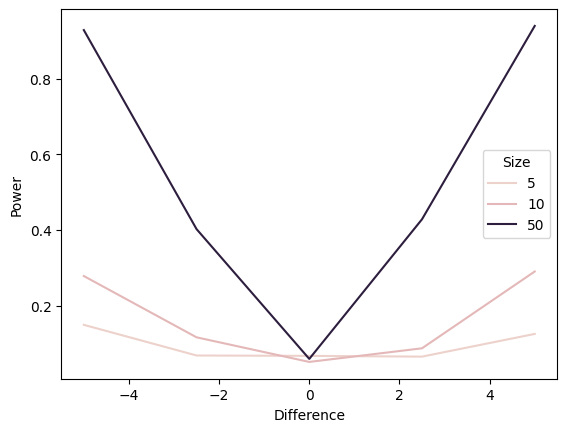

In [61]:
sns.lineplot(df,x='Difference',y='Power',hue='Size')